In [2]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os

In [3]:
embedding_index = {}
embedding_dim = 100
glove_dir = "/Users/tejask/Downloads"
f = open(os.path.join(glove_dir, 'glove.twitter.27B.100d.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coeff = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coeff
f.close()


In [4]:
embedding_index['apple'].shape


(100,)

In [12]:
embedding_index.pop('-0.32053') #has shape(99,) so poped from dict
def find_closest_embeddings(embedding):
    return sorted(embedding_index.keys(), key=lambda word: spatial.distance.euclidean(embedding_index[word], embedding))

'''
sorted takes an iterable as input and sorts it using a key. 
In this case, the iterable that we are passing in is all possible words that we want to sort.
We can get a list of such words by calling embeddings_dict.keys()
The key will be a lambda function that takes a word as input and returns the distance between that word’s embedding and the embedding we gave the function'''

'\nsorted takes an iterable as input and sorts it using a key. \nIn this case, the iterable that we are passing in is all possible words that we want to sort.\nWe can get a list of such words by calling embeddings_dict.keys()\nThe key will be a lambda function that takes a word as input and returns the distance between that word’s embedding and the embedding we gave the function'

In [15]:
find_closest_embeddings(embedding_index["apple"])[:15]

['apple',
 'microsoft',
 'samsung',
 'google',
 'nexus',
 'nokia',
 'iphone',
 'blackberry',
 'galaxy',
 'ipad',
 'bean',
 'smartphone',
 'lumia',
 'macbook',
 'windows']

In [14]:
find_closest_embeddings(embedding_index["king"])[:5]

['king', 'prince', 'aka', 'mr.', 'queen']

In [16]:
find_closest_embeddings(embedding_index["mango"])[:15]

['mango',
 'kiwi',
 'yogurt',
 'banana',
 'peach',
 'lime',
 'coconut',
 'strawberry',
 'mojito',
 'smoothie',
 'papaya',
 'lemon',
 'yoghurt',
 'pineapple',
 'choco']

In [18]:
print(find_closest_embeddings(
    embedding_index["twig"] - embedding_index["branch"] + embedding_index["hand"]
)[:5])

['hand', 'arm', 'finger', 'twig', 'tongue']


In [19]:
print(find_closest_embeddings(
    embedding_index["king"] - embedding_index["boy"] + embedding_index["girl"]
)[:5])

['king', 'queen', 'prince', 'aka', 'princess']


In [20]:
tsne = TSNE(n_components=2, random_state=0)

In [22]:
words =  list(embedding_index.keys())
vectors = [embedding_index[word] for word in words]


/Users/tejask/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65281 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tejask/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tejask/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tejask/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tejask/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tejask/opt/anaconda3/lib/python3.8/site-packages/matp

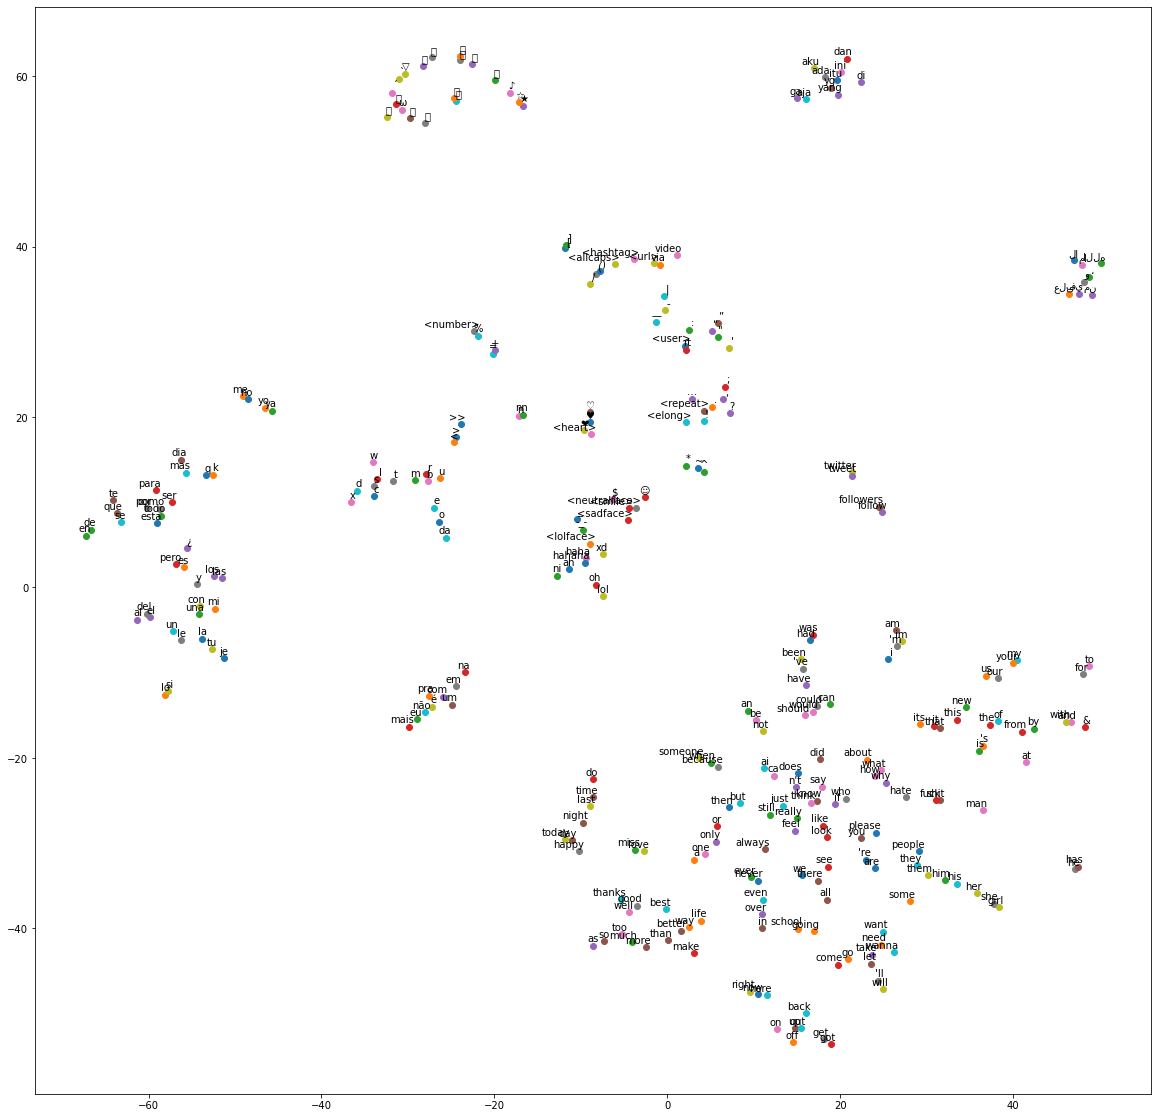

In [47]:
tsne = TSNE(perplexity=4,n_components=2, random_state=0)
coordinates = tsne.fit_transform(vectors[:300])
x=[]
y=[]
    
for value  in coordinates:
    x.append(value[0])
    y.append(value[1])
plt.figure(figsize=(20,20))
for i in range(len(x)):
    plt.scatter(x[i], y[i])
    plt.annotate(words[i],
                 xy=(x[i],y[i]),
                 xytext=(5,2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()